In [ ]:
import tensorflow as tf

In [ ]:
# Display the version
print(tf.__version__)
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

2.14.0


In [ ]:
# Load in the data
cifar10= tf.keras.datasets.cifar10
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test)= cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# Reduce pixel values
x_train, x_test= x_train/255.0, x_test/255.0

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


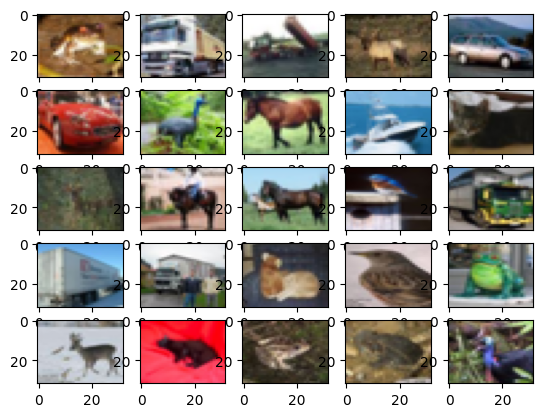

number of classes: 10


In [ ]:
# flatten the label values
y_train, y_test= y_train.flatten(), y_test.flatten()
# visualize data by plotting images
fig, ax=plt.subplots(5, 5)
k=0
for i in range(5):
  for j in range(5):
    ax[i][j].imshow(x_train[k], aspect='auto')
    k+=1
plt.show()
# number of classes
K= len(set(y_train))
# calculate the total number of classes
# for output layer
print("number of classes:", K)

In [ ]:
# Build the model using the function API
# input layer
i= Input(shape=x_train[0].shape)
x=Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2, 2))(x)
x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=MaxPooling2D((2, 2))(x)
x=Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)

In [ ]:
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [ ]:
# model description
model.summary()
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0   

In [ ]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=5)
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 520s 333ms/step - loss: 1.1773 - accuracy: 0.5833 - val_loss: 1.0948 - val_accuracy: 0.6343
Epoch 2/5
1563/1563 [==============================] - 518s 332ms/step - loss: 0.8205 - accuracy: 0.7160 - val_loss: 0.9046 - val_accuracy: 0.6930
Epoch 3/5
1563/1563 [==============================] - 516s 330ms/step - loss: 0.6756 - accuracy: 0.7683 - val_loss: 0.7063 - val_accuracy: 0.7601
Epoch 4/5
1563/1563 [==============================] - 511s 327ms/step - loss: 0.5642 - accuracy: 0.8067 - val_loss: 0.6646 - val_accuracy: 0.7735
Epoch 5/5
1563/1563 [==============================] - 491s 314ms/step - loss: 0.4780 - accuracy: 0.8377 - val_loss: 0.6204 - val_accuracy: 0.8019
Epoch 1/5
1562/1562 [==============================] - 546s 349ms/step - loss: 0.6804 - accuracy: 0.7714 - val_loss: 0.6318 - val_accuracy: 0.7871
Epoch 2/5
1562/1562 [==============================] - 539s 345ms/step - loss: 0.6047 - accuracy: 0.7969 - val_loss: 0

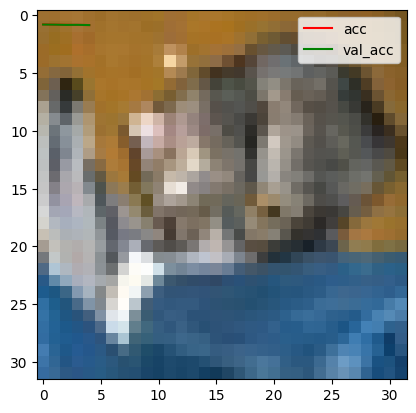

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

In [ ]:
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]
# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))
# save the model
model.save('geeksforgeeks.h5')

1/1 [==============================] - 0s 328ms/step
Original label is cat and predicted label is cat


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
